In [1]:
#import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
 

# Set the random seed for data generation (just for test cases)

np.random.seed(42)

In [2]:
import sys 
sys.path.append("../") # go to parent dir

In [3]:
import utils.save_and_load_spike_data as sl

In [4]:
FOLDER= 'Same/'
coupling_r='2500'

In [5]:
path = sl.PATH + FOLDER + 'fireflys100_' + coupling_r + 'OhmCouplingResistance' + sl.END
data = sl.load_spike_data(path)

In [6]:
#set frame duration -> in the paper this ranged from 1 to 16ms
frame_duration=[0.1,0.064,0.032,0.016,0.008,0.004,0.002,0.001,0.0005,0.0001,0.00001,0.000001]#50ms
t_simulation=180
avalanche_data=[]

for f in frame_duration:

  frames = np.linspace(0,t_simulation,int(t_simulation/f)+1)

  spiking_neurons_per_frame=np.zeros(len(frames))
  for i in range(len(data)):
    for j in np.digitize(data[i],frames):
      spiking_neurons_per_frame[j-1]+=1

  avalanche_sizes=[]
  curr_avalanche=False
  for elem in spiking_neurons_per_frame:
    if elem>0:
      if curr_avalanche==False:
        avalanche_sizes.append(elem)
        curr_avalanche=True
      else:
        avalanche_sizes[-1]+=elem
    

    else:
      curr_avalanche=False


  avalanche_data.append(avalanche_sizes)

In [7]:
len(avalanche_data)

12

In [8]:
events=np.zeros((len(avalanche_data),101))

In [9]:
for c,i in enumerate(avalanche_data):
    for elem in i:
        events[c,int(elem)]+=1

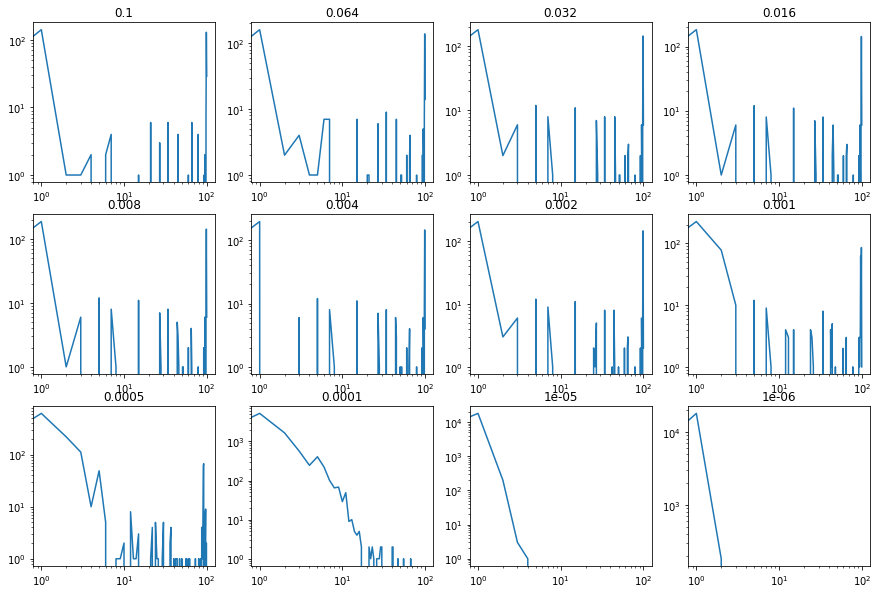

In [11]:
plt.figure(figsize=(15, 10))

for n in range(len(avalanche_data)):
    plt.subplot(3, 4, n+1)
    plt.title(frame_duration[n])
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(events[n,:])

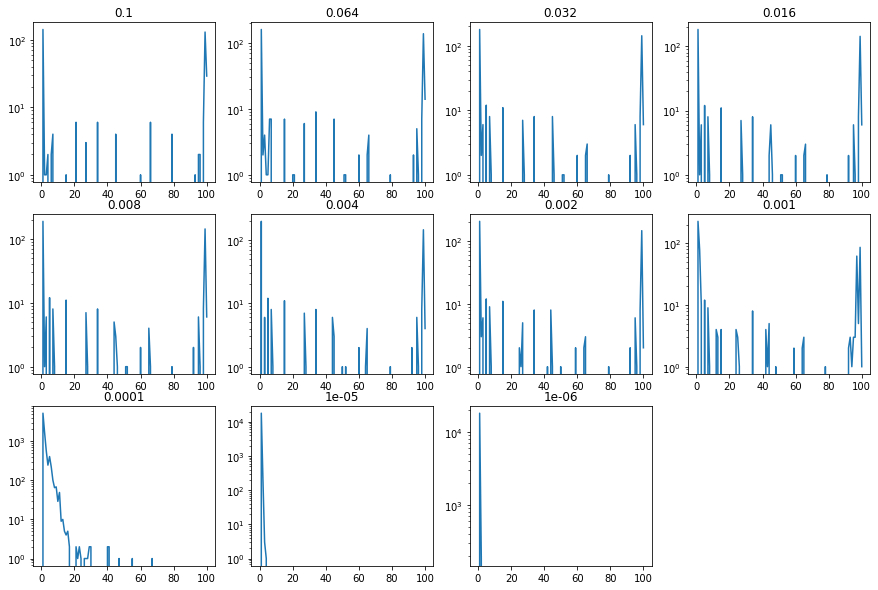

In [34]:
plt.figure(figsize=(15, 10))

for n in range(len(avalanche_data)):
    plt.subplot(3, 4, n+1)
    plt.title(frame_duration[n])
    plt.yscale('log')
    plt.plot(events[n,:])